In [39]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from collections import defaultdict

In [2]:
#load the grouped list for colnames
from utils import *
#目前只有mary road有tc,我们在做union model时候先不用tc
#可以单独给mary road做一个individual模型，里面使用tc
weathers_2.remove('tc')

# air_pollutions, weathers, weathers_2, times

In [3]:
air_pollutions, weathers, weathers_2, times

(['nox', 'no2', 'no', 'o3', 'pm2.5', 'pm10'],
 ['ws', 'wd', 'temp', 'RH'],
 ['ssr', 'tp', 'blh', 'tcc', 'sp', 'tc'],
 ['date_unix', 'week', 'weekday', 'hour', 'month', 'day_julian'])

In [8]:
data_folder = 'D:/Work/污染项目/data-overall-update/data_process/'\
              'before_engineer/union_per_pollution/'

In [5]:
pollutions = os.listdir(data_folder)
pollutions = [item[:-15] for item in pollutions if item.endswith('_unionSites.csv')]
pollutions

['no2', 'nox', 'no', 'o3', 'pm10', 'pm2.5']

# check missing values

# 1. 如果一个行所有的weathers数据都为空的话，那我们就将其删掉

In [6]:
def isnull_idx(df, target_colname, idx_colname):
    return df[df[target_colname].isnull()][idx_colname].tolist()


def group_all_null_idx(df, group_list, idx_colname):
    null_idxs_list = []
    
    for colname in group_list:
        null_idxs_list.append(set(isnull_idx(df, colname, idx_colname)))
        
    return set().intersection(*null_idxs_list)

In [13]:
for pollution in pollutions:
    
    df = pd.read_csv(data_folder+pollution+'_unionSites.csv')
    df['index'] = df.index

    weathers_allnull_indexs = group_all_null_idx(df, weathers, 'index')
    weathers_2_allnull_indexs = group_all_null_idx(df, weathers_2, 'index')
    times_allnull_indexs = group_all_null_idx(df, times, 'index')
    
    print (" in air pollution: "+pollution)
    print ("weathers group, all null rows count")
    print (len(weathers_allnull_indexs))
    print ("weathers_2 group, all null rows count")
    print (len(weathers_2_allnull_indexs))
    print ("times group, all null rows count")
    print (len(times_allnull_indexs))
    print ("-----------------------------------------")

 in air pollution: no2
weathers group, all null rows count
0
weathers_2 group, all null rows count
0
times group, all null rows count
0
-----------------------------------------
 in air pollution: nox
weathers group, all null rows count
0
weathers_2 group, all null rows count
0
times group, all null rows count
0
-----------------------------------------
 in air pollution: no
weathers group, all null rows count
0
weathers_2 group, all null rows count
0
times group, all null rows count
0
-----------------------------------------
 in air pollution: o3
weathers group, all null rows count
0
weathers_2 group, all null rows count
0
times group, all null rows count
0
-----------------------------------------
 in air pollution: pm10
weathers group, all null rows count
0
weathers_2 group, all null rows count
0
times group, all null rows count
0
-----------------------------------------
 in air pollution: pm2.5
weathers group, all null rows count
0
weathers_2 group, all null rows count
0
times gr

In [14]:
#这部分说明了对所有的pollution
#没有哪一行是全部缺失整个group的column的

# 2.检查各个x的column里面missing values都各占多少比例

In [37]:
def isnull_ratio(df, target_colname):
    null_cnts =  df[df[target_colname].isnull()].shape[0]
    return null_cnts/df.shape[0]

In [40]:
null_ratio = {}
for pollution in pollutions:
    
    df = pd.read_csv(data_folder+pollution+'_unionSites.csv')
    df['index'] = df.index
    null_ratio[pollution] = defaultdict()
    
    print (" in air pollution: "+pollution)
    
    for feature_x in weathers+weathers_2+times:
        null_ratio[pollution][feature_x] = isnull_ratio(df, feature_x)

 in air pollution: no2
 in air pollution: nox
 in air pollution: no
 in air pollution: o3
 in air pollution: pm10
 in air pollution: pm2.5


In [41]:
null_ratio

{'no2': defaultdict(None,
             {'ws': 0.0,
              'wd': 0.019015739371007107,
              'temp': 0.0002723517574253681,
              'RH': 0.002007721288712649,
              'ssr': 0.0,
              'tp': 0.0,
              'blh': 0.0005540146860447658,
              'tcc': 0.0005540146860447658,
              'sp': 0.0005540146860447658,
              'date_unix': 0.0,
              'week': 0.0,
              'weekday': 0.0,
              'hour': 0.0,
              'month': 0.0,
              'day_julian': 0.0}),
 'nox': defaultdict(None,
             {'ws': 0.0,
              'wd': 0.019015739371007107,
              'temp': 0.0002723517574253681,
              'RH': 0.002007721288712649,
              'ssr': 0.0,
              'tp': 0.0,
              'blh': 0.0005540146860447658,
              'tcc': 0.0005540146860447658,
              'sp': 0.0005540146860447658,
              'date_unix': 0.0,
              'week': 0.0,
              'weekday': 0.0,
        

# 3. 剩下的rows里面，missing values是否用median值来替换？
# Missing value 到底应该用什么值来替换？

In [15]:
pollution = pollutions[0]
df = pd.read_csv(data_folder+pollution+'_unionSites.csv')
df['index'] = df.index

array([<AxesSubplot:title={'center':'wd'}>], dtype=object)

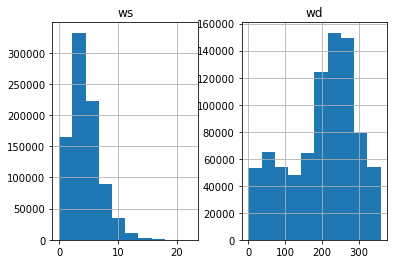

In [32]:
fig, axes = plt.subplots(1, 2)

df.hist('ws', ax=axes[0])
df.hist('wd', ax=axes[1])

array([<AxesSubplot:title={'center':'RH'}>], dtype=object)

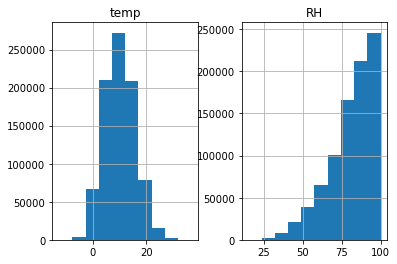

In [30]:
fig, axes = plt.subplots(1, 2)

df.hist('temp', ax=axes[0])
df.hist('RH', ax=axes[1])

array([<AxesSubplot:title={'center':'tp'}>], dtype=object)

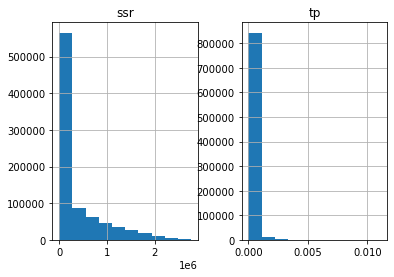

In [33]:
fig, axes = plt.subplots(1, 2)

df.hist('ssr', ax=axes[0])
df.hist('tp', ax=axes[1])

array([<AxesSubplot:title={'center':'tcc'}>], dtype=object)

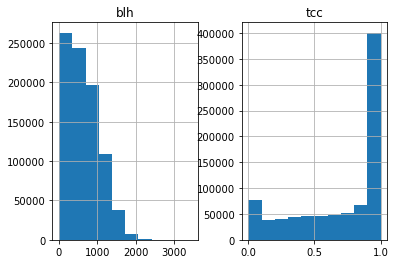

In [34]:
fig, axes = plt.subplots(1, 2)

df.hist('blh', ax=axes[0])
df.hist('tcc', ax=axes[1])

(array([1.98000e+02, 2.05700e+03, 1.07030e+04, 3.94130e+04, 1.12644e+05,
        2.09669e+05, 2.76454e+05, 1.68523e+05, 3.68740e+04, 2.17200e+03]),
 array([ 93530.6875 ,  94629.80625,  95728.925  ,  96828.04375,
         97927.1625 ,  99026.28125, 100125.4    , 101224.51875,
        102323.6375 , 103422.75625, 104521.875  ]),
 <BarContainer object of 10 artists>)

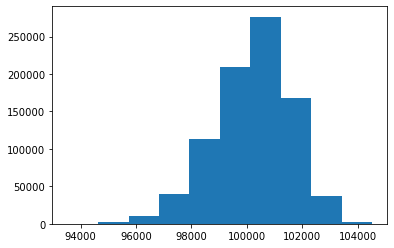

In [36]:
plt.hist(df['sp'])